Вариант 6:
$$\ddot{u} - u + u^3 + \lambda u^5 \cos 2t = 0$$

Перепишем в виде системы:
$$
\begin{cases}
    \dot{u} = v\\
    \dot{v} = u - u^3 - \lambda u^5 \cos 2t
\end{cases}
$$

Правые части - $\pi$-периодические функции, значит отображение Пуанкаре определено.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
def func(t, y, lm):
    u, v = y
    dydt = [v, (1 + lm * np.cos(2 * t)) * u - u ** 3]
    return dydt

L = np.pi

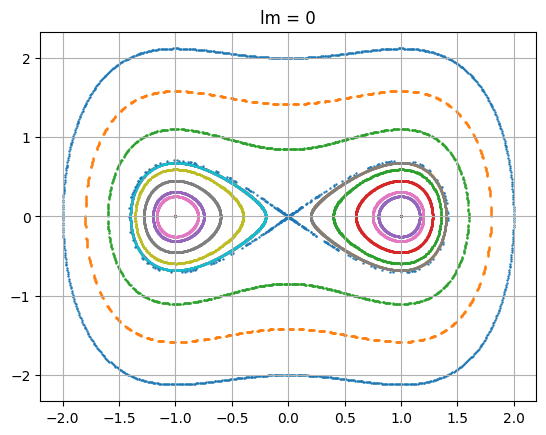

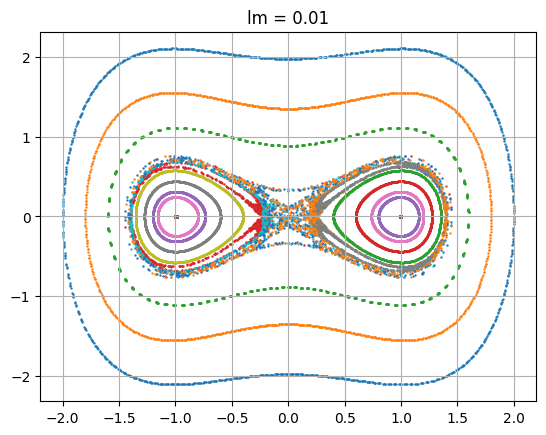

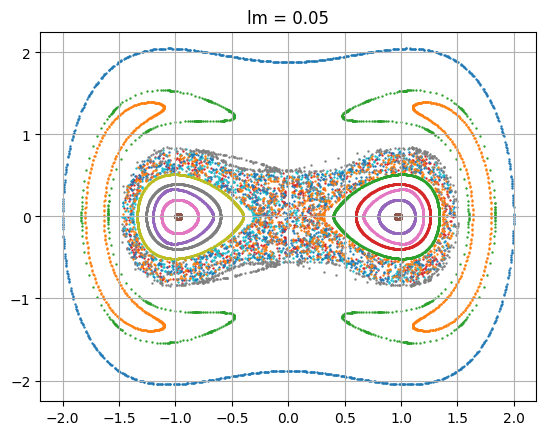

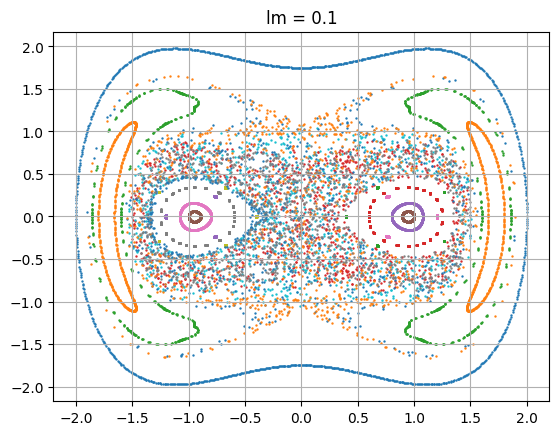

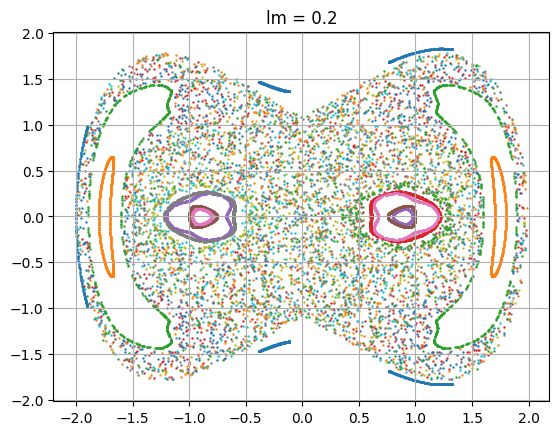

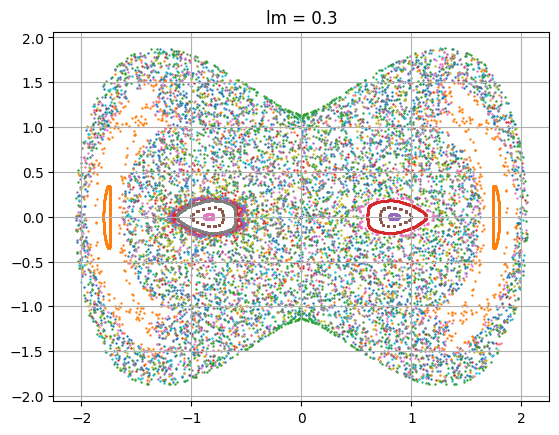

In [3]:
K = 1000

time_border = (0, K * L)
time = np.arange(time_border[0], time_border[1] + L, L)

start_u = np.arange(-2, 1.6, 0.2)
lms = [0, 0.01, 0.05, 0.1, 0.2, 0.3]
for lm in lms:
    plt.figure()
    for i in range(len(start_u)):
        cauchy = (start_u[i], 0)
        sol = sc.integrate.odeint(func, cauchy, time, args=(lm, ), atol=10**-11, rtol=10**-11, tfirst=True)
        plt.scatter(sol[:, 0], sol[:, 1], s=0.5)

    plt.title(f"lm = {lm}")
    plt.grid(True)

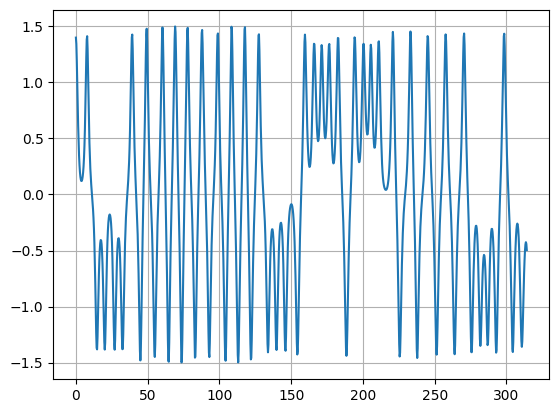

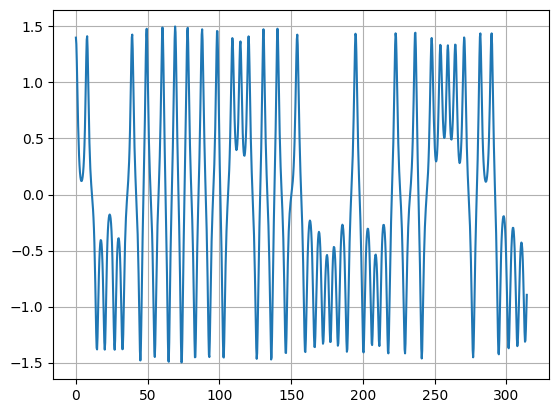

In [4]:
n = 1000
time_border = (0, 100 * L)
time = np.linspace(time_border[0], time_border[1], n + 1)

lm = 0.1
y0 = (0.01, 0.01)

sol_1 = sc.integrate.solve_ivp(func, time_border, cauchy, t_eval=time, args=(lm, ), method='RK45', atol=10**-10, rtol=10**-10)
sol_2 = sc.integrate.solve_ivp(func, time_border, cauchy, t_eval=time, args=(lm, ), method='DOP853', atol=10**-10, rtol=10**-10)

plt.figure()
plt.plot(sol_1.t, sol_1.y[0, :])
plt.grid(True)

plt.figure()
plt.plot(sol_2.t, sol_2.y[0, :])
plt.grid(True)